# **Analysing Data:** Assignment 1
*Liesa Albers (S3830381)*

---

#### Preparation

To achieve the correct outputs in this notebook, the `assignment_1/data` directory from [this](https://github.com/LiesaAlbers/analysing-data) repository must be downloaded and placed in the same folder as this notebook. Make sure that the names of the directories are **not** altered.

Next, to be able to run the code in this notebook, the required packages must be installed and imported. If you don't already have the packages below installed, you can run these code blocks:

In [401]:
%%capture

# Install spacy and download necessary models
!pip install spacy==3.8.0
!spacy download de_core_news_sm
!spacy download nl_core_news_sm
!spacy download en_core_web_sm

In [402]:
# Import necessary packages/libraries/modules
import spacy
from spacy import displacy
import os
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from collections import Counter

In [403]:
# Download necessary NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liesaalbers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

---

## Part I

### 1. Sentence Splitting & Tokenisation

In [407]:
# Define directory containing text files
directory = 'data/Part_I_1-2'

# Initialise dictionaries for word frequencies
word_frequencies = {}
total_word_frequencies = Counter()

# Process each text file in directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            
            # Sentence splitting
            sentences = sent_tokenize(text)
            
            # Word tokenisation
            words = word_tokenize(text)
            
            # Calculate word frequency
            word_count = Counter(words)
            word_frequencies[filename] = word_count
            
            # Update total word frequencies
            total_word_frequencies.update(word_count)

total_word_frequencies

Counter({',': 561,
         '.': 492,
         'the': 253,
         'to': 236,
         'you': 235,
         'her': 182,
         'and': 170,
         '’': 163,
         'she': 147,
         'a': 133,
         'your': 115,
         'was': 113,
         'of': 107,
         '“': 104,
         '”': 104,
         'he': 89,
         'in': 85,
         'Doctor': 83,
         't': 82,
         'I': 81,
         'that': 80,
         'it': 79,
         'The': 76,
         'You': 72,
         'She': 67,
         'with': 55,
         'his': 54,
         'for': 53,
         'He': 52,
         "''": 51,
         'him': 49,
         'had': 47,
         '``': 47,
         'on': 46,
         'Rose': 46,
         'at': 44,
         'but': 42,
         '?': 41,
         's': 40,
         'as': 39,
         'out': 35,
         'so': 35,
         'be': 34,
         'not': 31,
         'could': 29,
         'up': 29,
         'were': 28,
         'back': 27,
         'have': 26,
         'from': 26,
      

In [408]:
# Word frequencies per story
print("Word Frequencies per Story:")
for story, freq in word_frequencies.items():
    print(f"\n{story}: {freq}")

Word Frequencies per Story:

01.txt: Counter({',': 30, 'the': 14, 'her': 12, 'River': 11, 'Missy': 10, 'a': 10, '.': 10, 'and': 9, 'to': 8, 'was': 7, 'on': 7, '“': 6, '”': 6, 'maps': 5, 'at': 5, '’': 5, 'it': 4, 'over': 4, 's': 4, '?': 3, 'sitting': 3, 'chair': 3, 'had': 3, 'The': 3, 'that': 3, 'placing': 3, 'she': 3, 'in': 2, 'house': 2, 'map': 2, 'out': 2, 'of': 2, 'people': 2, 'own': 2, 'this': 2, 'She': 2, 'looked': 2, 'smiled': 2, 'still': 2, 'place': 2, 'It': 2, 'smiles': 2, 'leans': 2, 'kiss': 2, 'smile': 2, 'table': 2, 'cup': 2, 'coffee': 2, 'or': 2, 'little': 2, 'turned': 2, 'Another': 1, 'plot': 1, 'Bones_Bard': 1, '--': 1, '-': 1, 'papers': 1, 'spread': 1, 'around': 1, 'normally': 1, 'planning': 1, 'mental': 1, 'but': 1, 'suggested': 1, 'physical': 1, 'refer': 1, 'helpful': 1, 'walked': 1, 'bedroom': 1, 'who': 1, 'really': 1, 'have': 1, 'no': 1, 'good': 1, 'clothes.': 1, 'wearing': 1, 't-shirt': 1, 'drenched': 1, 'form': 1, 'some': 1, 'trousers': 1, 'about': 1, 'right': 1, '

In [409]:
# Word frequencies in total
print("Total Word Frequencies:")
print(total_word_frequencies)

Total Word Frequencies:
Counter({',': 561, '.': 492, 'the': 253, 'to': 236, 'you': 235, 'her': 182, 'and': 170, '’': 163, 'she': 147, 'a': 133, 'your': 115, 'was': 113, 'of': 107, '“': 104, '”': 104, 'he': 89, 'in': 85, 'Doctor': 83, 't': 82, 'I': 81, 'that': 80, 'it': 79, 'The': 76, 'You': 72, 'She': 67, 'with': 55, 'his': 54, 'for': 53, 'He': 52, "''": 51, 'him': 49, 'had': 47, '``': 47, 'on': 46, 'Rose': 46, 'at': 44, 'but': 42, '?': 41, 's': 40, 'as': 39, 'out': 35, 'so': 35, 'be': 34, 'not': 31, 'could': 29, 'up': 29, 'were': 28, 'back': 27, 'have': 26, 'from': 26, 'It': 25, 'how': 25, 'didn': 25, 'like': 25, 'this': 24, 'eyes': 24, 'just': 24, 'time': 24, "'": 24, 'what': 23, 'do': 23, 'would': 23, 'about': 22, 'd': 22, 'when': 22, '!': 21, "'d": 21, 'me': 20, 'Martha': 20, 'face': 19, 'an': 19, 'all': 19, 'is': 19, 'or': 18, 'know': 18, 'if': 18, 'more': 17, "n't": 17, 'again': 17, 'smile': 16, 'did': 16, 'one': 16, 'into': 16, 'let': 16, 'TARDIS': 16, 'yet': 15, 'down': 15, 'no

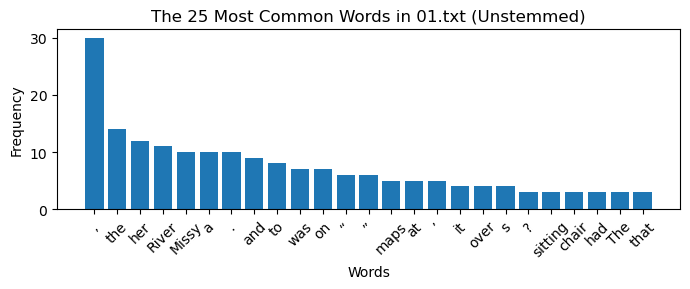

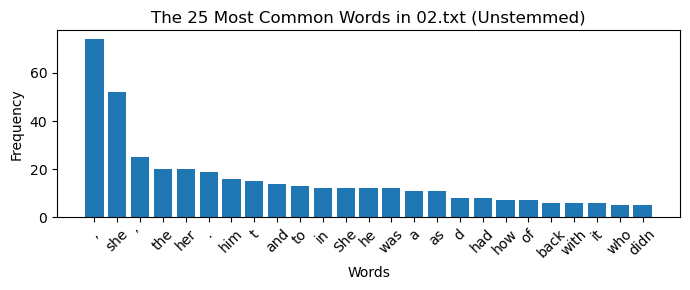

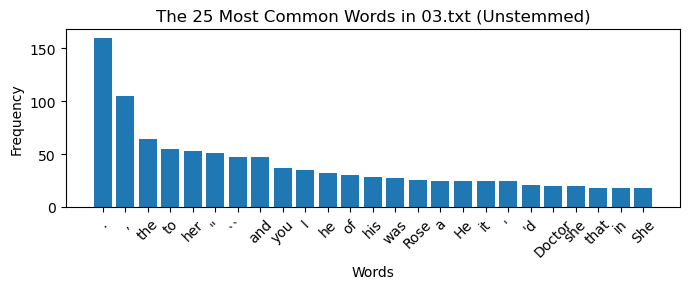

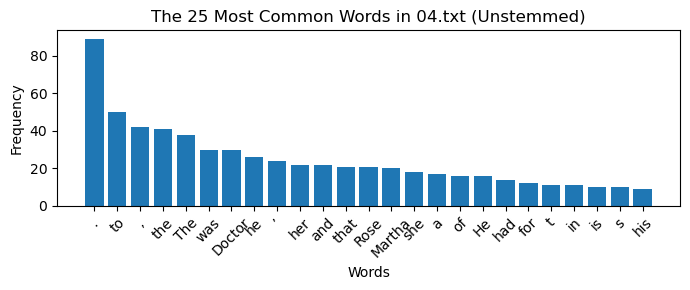

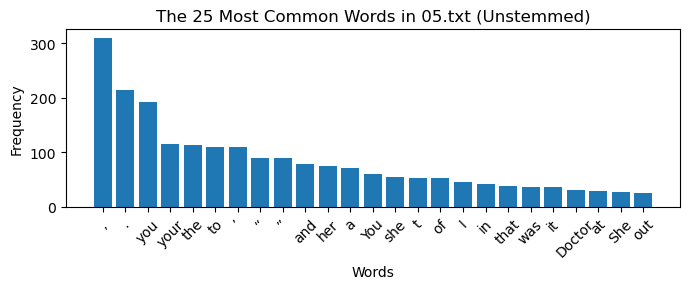

In [410]:
# Plot 25 most common words per story
for story, freq in word_frequencies.items():
    common_words = freq.most_common(25)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(7, 3))
    plt.bar(words, counts)
    plt.title(f'The 25 Most Common Words in {story} (Unstemmed)')
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

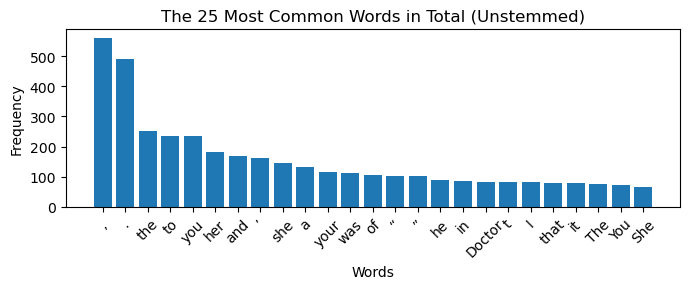

In [411]:
# Plot 25 most common words in total
total_common_words = total_word_frequencies.most_common(25)
total_words, total_counts = zip(*total_common_words)

plt.figure(figsize=(7, 3))
plt.bar(total_words, total_counts)
plt.title('The 25 Most Common Words in Total (Unstemmed)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2. Stemming

In [413]:
# (re)Define directory containing text files
directory = 'data/Part_I_1-2'

# Initialise stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

# Initialise dictionaries for word frequencies
word_frequencies_porter = {}
word_frequencies_lancaster = {}
total_word_frequencies_porter = Counter()
total_word_frequencies_lancaster = Counter()

# Process each text file in directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            
            # Sentence splitting
            sentences = sent_tokenize(text)
            
            # Word tokenisation
            words = word_tokenize(text)

            # Stemming with Porter Stemmer and counting frequencies
            stemmed_porter = [porter_stemmer.stem(word) for word in words]
            word_count_porter = Counter(stemmed_porter)
            word_frequencies_porter[filename] = word_count_porter
            total_word_frequencies_porter.update(word_count_porter)

            # Stemming with Lancaster Stemmer and counting frequencies
            stemmed_lancaster = [lancaster_stemmer.stem(word) for word in words]
            word_count_lancaster = Counter(stemmed_lancaster)
            word_frequencies_lancaster[filename] = word_count_lancaster
            total_word_frequencies_lancaster.update(word_count_lancaster)

In [414]:
# Word frequencies per story using Porter Stemmer
print("Porter Stemmer - Word Frequencies per Story:")
for story, freq in word_frequencies_porter.items():
    print(f"\n{story}: {freq}")

Porter Stemmer - Word Frequencies per Story:

01.txt: Counter({',': 30, 'the': 17, 'her': 12, 'river': 11, 'missi': 10, 'a': 10, '.': 10, 'and': 9, 'to': 8, 'wa': 7, 'on': 7, 'map': 7, 'it': 6, '“': 6, '”': 6, 'smile': 6, 'she': 5, 'look': 5, 'at': 5, '’': 5, 'place': 5, 'that': 4, 'over': 4, 's': 4, '?': 3, 'sit': 3, 'chair': 3, 'had': 3, 'cup': 3, 'in': 2, 'hous': 2, 'normal': 2, 'out': 2, 'of': 2, 'peopl': 2, 'own': 2, 'thi': 2, 'still': 2, 'point': 2, 'lean': 2, 'kiss': 2, 'tabl': 2, 'coffe': 2, 'bit': 2, 'or': 2, 'littl': 2, 'turn': 2, 'anoth': 1, 'plot': 1, 'bones_bard': 1, '--': 1, '-': 1, 'paper': 1, 'spread': 1, 'around': 1, 'plan': 1, 'mental': 1, 'but': 1, 'suggest': 1, 'physic': 1, 'refer': 1, 'help': 1, 'walk': 1, 'bedroom': 1, 'who': 1, 'realli': 1, 'have': 1, 'no': 1, 'good': 1, 'clothes.': 1, 'wear': 1, 't-shirt': 1, 'drench': 1, 'form': 1, 'some': 1, 'trouser': 1, 'about': 1, 'right': 1, 'size': 1, 'mari': 1, 'poppin': 1, 'outfit': 1, 'darl': 1, 'wouldn': 1, 't': 1, 'b

In [415]:
# Word frequencies per story using Lancaster Stemmer
print("Lancaster Stemmer - Word Frequencies per Story:")
for story, freq in word_frequencies_lancaster.items():
    print(f"\n{story}: {freq}")

Lancaster Stemmer - Word Frequencies per Story:

01.txt: Counter({',': 30, 'the': 17, 'her': 12, 'riv': 11, 'missy': 10, 'a': 10, '.': 10, 'and': 9, 'to': 8, 'was': 7, 'on': 7, 'map': 7, 'it': 6, '“': 6, '”': 6, 'smil': 6, 'she': 5, 'look': 5, 'at': 5, '’': 5, 'plac': 5, 'that': 4, 'ov': 4, 's': 4, '?': 3, 'sit': 3, 'chair': 3, 'had': 3, 'cup': 3, 'in': 2, 'hous': 2, 'norm': 2, 'out': 2, 'of': 2, 'peopl': 2, 'own': 2, 'thi': 2, 'stil': 2, 'point': 2, 'lean': 2, 'kiss': 2, 'tabl': 2, 'coff': 2, 'bit': 2, 'or': 2, 'littl': 2, 'turn': 2, 'anoth': 1, 'plot': 1, 'bones_bard': 1, '--': 1, '-': 1, 'pap': 1, 'spread': 1, 'around': 1, 'plan': 1, 'ment': 1, 'but': 1, 'suggest': 1, 'phys': 1, 'ref': 1, 'help': 1, 'walk': 1, 'bedroom': 1, 'who': 1, 'real': 1, 'hav': 1, 'no': 1, 'good': 1, 'clothes.': 1, 'wear': 1, 't-shirt': 1, 'drench': 1, 'form': 1, 'som': 1, 'trous': 1, 'about': 1, 'right': 1, 'siz': 1, 'mary': 1, 'poppin': 1, 'outfit': 1, 'darl': 1, 'wouldn': 1, 't': 1, 'be': 1, 'bet': 1, 'sta

In [416]:
# Word frequencies in total using Porter Stemmer
print("Porter Stemmer - Total Word Frequencies:\n")
print(total_word_frequencies_porter)

Porter Stemmer - Total Word Frequencies:

Counter({',': 561, '.': 492, 'the': 329, 'you': 307, 'to': 238, 'she': 214, 'her': 194, 'and': 176, '’': 163, 'he': 141, 'a': 140, 'your': 124, 'wa': 115, 'of': 109, 'it': 106, '“': 104, '”': 104, 'in': 88, 'that': 88, 'doctor': 83, 't': 82, 'i': 81, 'hi': 59, 'with': 58, 'but': 55, 'for': 55, "''": 51, 'him': 49, 'had': 47, '``': 47, 'rose': 47, 'on': 46, 'at': 46, 'as': 42, '?': 41, 'so': 41, 's': 40, 'be': 39, 'not': 39, 'time': 36, 'out': 35, 'when': 31, 'have': 29, 'could': 29, 'up': 29, 'smile': 28, 'back': 28, 'were': 28, 'what': 28, 'eye': 28, 'how': 28, 'thi': 27, 'do': 27, 'from': 26, 'like': 26, 'look': 25, 'hand': 25, 'didn': 25, 'an': 24, 'want': 24, 'just': 24, 'if': 24, "'": 24, 'would': 23, 'no': 22, 'about': 22, 'there': 22, 'face': 22, 'now': 22, 'd': 22, '!': 21, "'d": 21, 'me': 20, 'know': 20, 'all': 20, 'martha': 20, 'more': 19, 'is': 19, 'or': 18, 'they': 17, 'one': 17, "n't": 17, 'again': 17, 'down': 16, 'did': 16, 'into'

In [417]:
# Word frequencies in total using Lancaster Stemmer
print("Lancaster Stemmer - Total Word Frequencies:\n")
print(total_word_frequencies_lancaster)

Lancaster Stemmer - Total Word Frequencies:

Counter({',': 561, '.': 492, 'the': 329, 'you': 307, 'to': 238, 'she': 214, 'her': 197, 'and': 176, '’': 163, 'he': 141, 'a': 140, 'yo': 124, 'was': 115, 'of': 109, 'it': 106, '“': 104, '”': 104, 'in': 88, 'that': 88, 'doct': 83, 't': 82, 'i': 81, 'on': 77, 'his': 59, 'with': 58, 'but': 55, 'for': 55, "''": 51, 'him': 49, 'had': 47, 'at': 47, '``': 47, 'ros': 47, 'not': 45, 'as': 42, '?': 41, 'so': 41, 's': 40, 'tim': 36, 'out': 35, 'wer': 35, 'be': 34, 'when': 31, 'hav': 29, 'could': 29, 'up': 29, 'smil': 28, 'back': 28, 'what': 28, 'ey': 28, 'how': 28, 'thi': 27, 'from': 26, 'lik': 26, 'look': 25, 'hand': 25, 'do': 25, 'didn': 25, 'an': 24, 'want': 24, 'just': 24, 'if': 24, "'": 24, 'ev': 23, 'would': 23, 'no': 22, 'about': 22, 'ther': 22, 'fac': 22, 'now': 22, 'd': 22, '!': 21, "'d": 21, 'al': 21, 'mor': 20, 'me': 20, 'know': 20, 'marth': 20, 'is': 19, 'real': 18, 'or': 18, 'us': 18, 'they': 17, "n't": 17, 'again': 17, 'down': 16, 'did': 

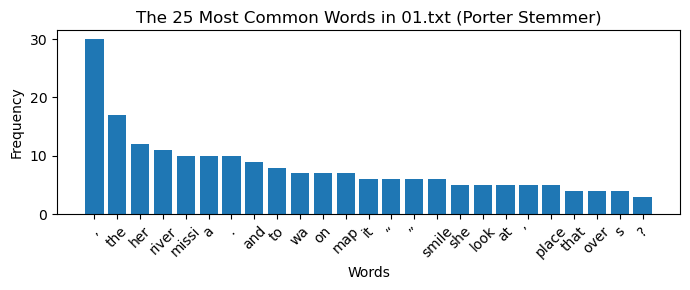

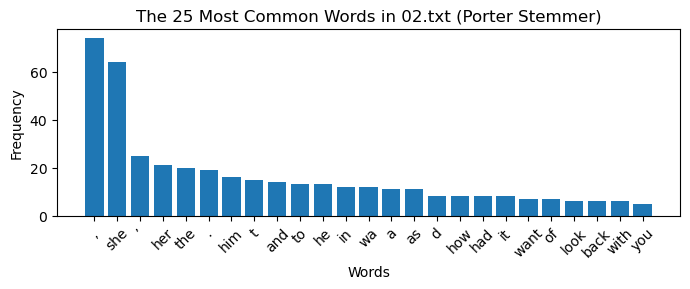

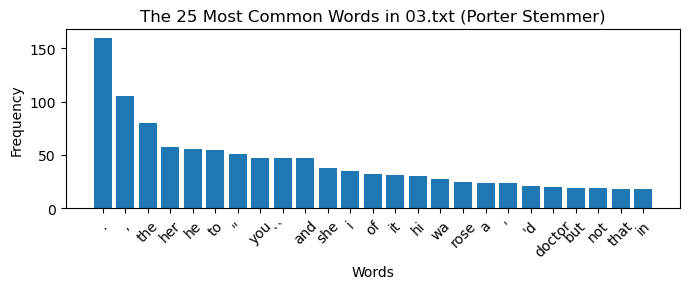

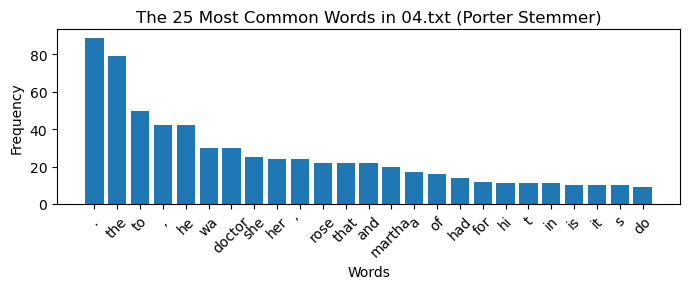

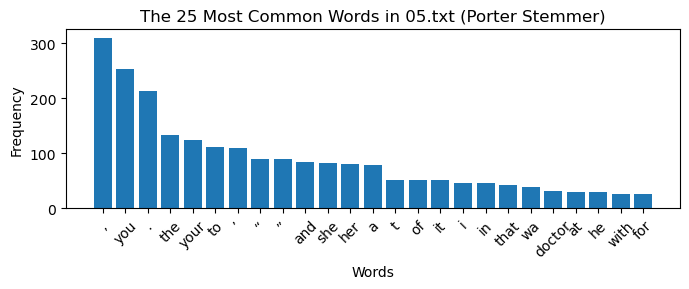

In [418]:
# Plot 25 most common words per story using Porter Stemmer
for story, freq in word_frequencies_porter.items():
    common_words = freq.most_common(25)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(7, 3))
    plt.bar(words, counts)
    plt.title(f'The 25 Most Common Words in {story} (Porter Stemmer)')
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

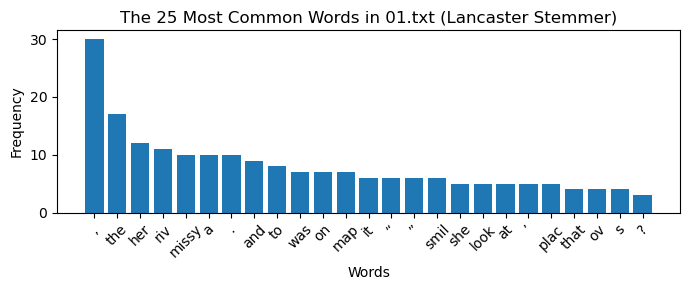

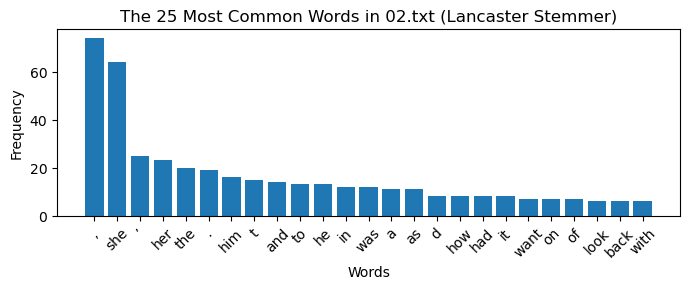

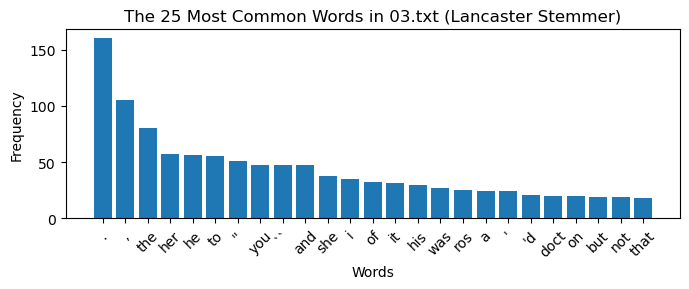

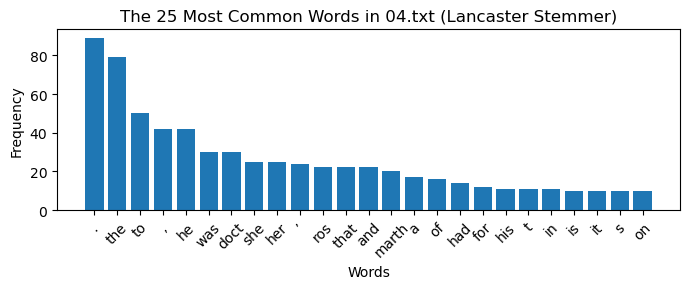

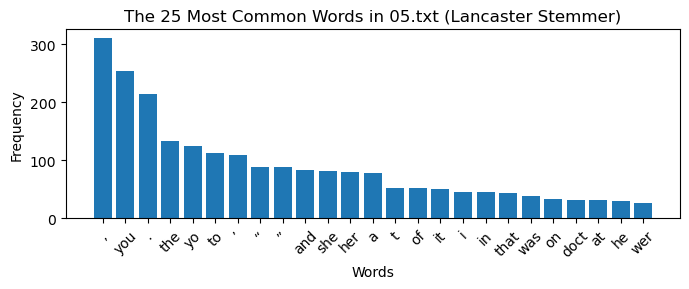

In [419]:
# Plot 25 most common words per story using Lancaster Stemmer
for story, freq in word_frequencies_lancaster.items():
    common_words = freq.most_common(25)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(7, 3))
    plt.bar(words, counts)
    plt.title(f'The 25 Most Common Words in {story} (Lancaster Stemmer)')
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

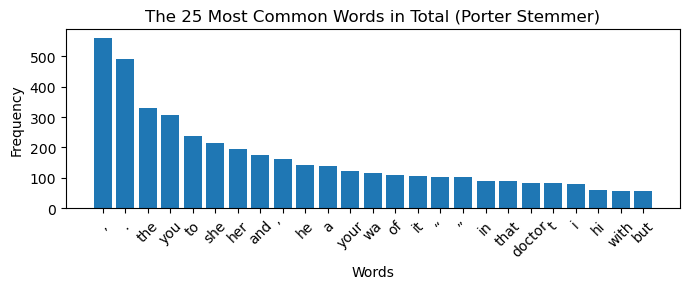

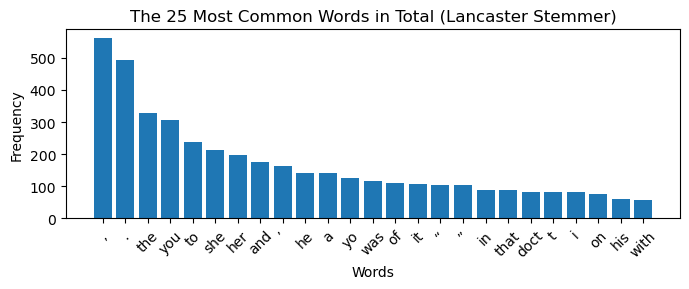

In [420]:
# Plot 25 most common words in total using Porter Stemmer
total_common_words_porter = total_word_frequencies_porter.most_common(25)
total_words_porter, total_counts_porter = zip(*total_common_words_porter)

plt.figure(figsize=(7, 3))
plt.bar(total_words_porter, total_counts_porter)
plt.title('The 25 Most Common Words in Total (Porter Stemmer)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 25 most common words in total using Lancaster Stemmer
total_common_words_lancaster = total_word_frequencies_lancaster.most_common(25)
total_words_lancaster, total_counts_lancaster = zip(*total_common_words_lancaster)

plt.figure(figsize=(7, 3))
plt.bar(total_words_lancaster, total_counts_lancaster)
plt.title('The 25 Most Common Words in Total (Lancaster Stemmer)')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [421]:
# Create overview differences stemmed-unstemmed results
for word in set(total_word_frequencies.keys()).union(set(total_word_frequencies_porter.keys())).union(set(total_word_frequencies_lancaster.keys())):
    unstemmed_count = total_word_frequencies[word]
    porter_count = total_word_frequencies_porter[word]
    lancaster_count = total_word_frequencies_lancaster[word]
    
    if unstemmed_count != porter_count or unstemmed_count != lancaster_count:
        print(f"Word: {word} | Unstemmed Count: {unstemmed_count} | Porter Count: {porter_count} | Lancaster Count: {lancaster_count}")

Word: That | Unstemmed Count: 8 | Porter Count: 0 | Lancaster Count: 0
Word: Martha | Unstemmed Count: 20 | Porter Count: 0 | Lancaster Count: 0
Word: pap | Unstemmed Count: 0 | Porter Count: 0 | Lancaster Count: 1
Word: layered | Unstemmed Count: 1 | Porter Count: 0 | Lancaster Count: 0
Word: ruin | Unstemmed Count: 0 | Porter Count: 2 | Lancaster Count: 2
Word: necess | Unstemmed Count: 0 | Porter Count: 0 | Lancaster Count: 1
Word: consuming | Unstemmed Count: 1 | Porter Count: 0 | Lancaster Count: 0
Word: diff | Unstemmed Count: 0 | Porter Count: 0 | Lancaster Count: 5
Word: fel | Unstemmed Count: 0 | Porter Count: 0 | Lancaster Count: 2
Word: adventure | Unstemmed Count: 4 | Porter Count: 0 | Lancaster Count: 0
Word: brilliant | Unstemmed Count: 5 | Porter Count: 5 | Lancaster Count: 0
Word: So | Unstemmed Count: 6 | Porter Count: 0 | Lancaster Count: 0
Word: haphazardly | Unstemmed Count: 1 | Porter Count: 0 | Lancaster Count: 0
Word: meantime | Unstemmed Count: 1 | Porter Count:

In [422]:
# Illustrate specific example (words containing string 'lov')

# Initialise a dictionary to store results
lov_related = {
    'Unstemmed': {},
    'Porter': {},
    'Lancaster': {}
}

# Define function to filter dictionary for keys containing 'love'
def filter_lov_related(word_frequencies):
    return {key: value for key, value in word_frequencies.items() if 'lov' in key}

# Call function and store results in dictionary
lov_related['Unstemmed'] = filter_lov_related(total_word_frequencies)
lov_related['Porter'] = filter_lov_related(total_word_frequencies_porter)
lov_related['Lancaster'] = filter_lov_related(total_word_frequencies_lancaster)

# Print dictionary
print(lov_related)

{'Unstemmed': {'loved': 6, 'love': 5, 'loving-': 1, 'lovely': 1, 'lov-': 1}, 'Porter': {'love': 13, 'loving-': 1, 'lov-': 1}, 'Lancaster': {'lov': 13, 'loving-': 1, 'lov-': 1}}


### 3. Part-of-Speech Tagging  

#### Cleaning Documents

In [425]:
# (re)Define directory
directory = 'data/Part_I_3'

# Initialise empty list for combined texts
combined_texts = []

# Loop through each file and append to list
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            combined_texts.append(file.read())

In [426]:
# Initialise variables for each text
de_text = None
nl_text = None
en_text = None

# Clean unnecessary sections from text and split respective texts per language
for text in combined_texts:
    text = text.split('*** END OF THE PROJECT GUTENBERG EBOOK')[0]
    if 'Erstes Kapitel.' in text:
        de_text = text.split('Erstes Kapitel')[1].strip() # Also remove leading/trailing whitespaces
    elif 'HOOFDSTUK I.' in text:
        nl_text = text.split('HOOFDSTUK I.')[1].strip() 
    elif 'CHAPTER I.' in text:
        en_text = text.split('\n\n\n\nCHAPTER I\n')[1].strip() 

In [427]:
# Remove excess line breaks
de_text = re.sub(r'\n+', ' ', de_text)
nl_text = re.sub(r'\n+', ' ', nl_text)
en_text = re.sub(r'\n+', ' ', en_text)

#### Retreiving POS Tags with SpaCy

In [429]:
# Load the language models
nlp_de = spacy.load("de_core_news_sm") 
nlp_nl = spacy.load("nl_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

# Define function to get POS tags
def get_pos_tags(text, nlp_model):
    doc = nlp_model(text)
    pos_tags = [token.pos_ for token in doc]
    return pos_tags

# Retrieve POS tags using the respective language model for each text 
de_pos_tags = get_pos_tags(de_text, nlp_de)
nl_pos_tags = get_pos_tags(nl_text, nlp_nl)
en_pos_tags = get_pos_tags(en_text, nlp_en)

#### Retrieving & Plotting POS Tag Frequencies

In [431]:
# Define function to get POS tag frequencies
def get_pos_frequencies(pos_tags):
    pos_frequencies = Counter(pos_tags)
    return dict(pos_frequencies)

# Retrieve POS frequencies for each text
de_pos_frequencies = get_pos_frequencies(de_pos_tags)
nl_pos_frequencies = get_pos_frequencies(nl_pos_tags)
en_pos_frequencies = get_pos_frequencies(en_pos_tags)

In [432]:
# Define function to sort and print POS tag frequencies
def sort_frequencies(frequencies, language):
    sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)  # Sort frequencies from high to low
    tags, counts = zip(*sorted_frequencies) 

    print(f'\n{language}:')
    for tag, count in sorted_frequencies:
        print(f'{tag}: {count}')

sort_frequencies(de_pos_frequencies, 'German')
sort_frequencies(nl_pos_frequencies, 'Dutch')
sort_frequencies(en_pos_frequencies, 'English')


German:
PUNCT: 18397
NOUN: 11101
VERB: 9451
ADV: 9275
PRON: 8752
DET: 7469
ADP: 5249
AUX: 3739
CCONJ: 3353
ADJ: 2947
PROPN: 2154
PART: 1693
SCONJ: 1516
NUM: 313
X: 217
INTJ: 212
SPACE: 81

Dutch:
PUNCT: 13953
NOUN: 11865
VERB: 11646
PRON: 10071
ADP: 8783
DET: 7032
ADV: 5772
ADJ: 5045
AUX: 3997
PROPN: 3548
CCONJ: 3500
SCONJ: 2011
NUM: 398
INTJ: 366
SYM: 306
SPACE: 47
X: 24

English:
PUNCT: 15315
NOUN: 12060
VERB: 11363
PRON: 10282
ADP: 7262
DET: 6853
ADV: 4924
ADJ: 4385
AUX: 4345
CCONJ: 3837
PROPN: 2987
PART: 2122
SCONJ: 1796
NUM: 627
INTJ: 482
X: 77
SPACE: 34
SYM: 1


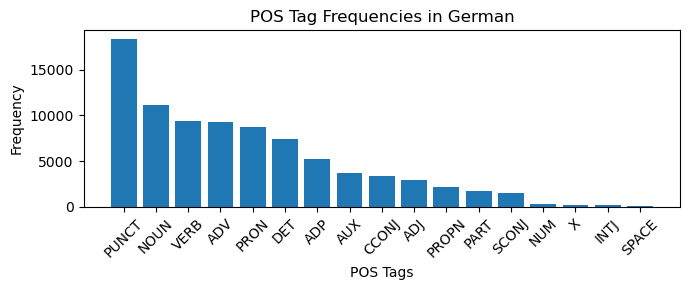

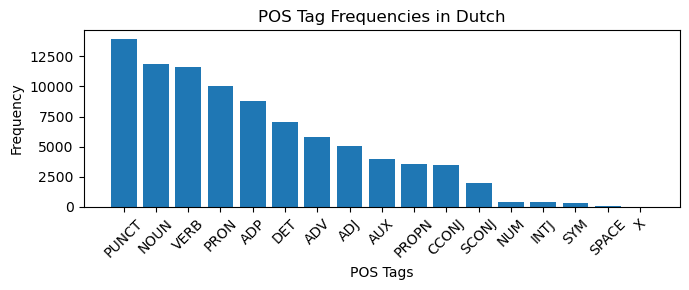

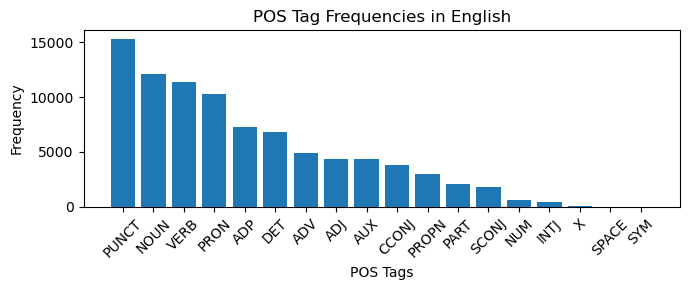

In [433]:
# Define function to sort and plot POS tag frequencies
def plot_pos_frequencies(frequencies, language):
    sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True) # Sort frequencies from most to least
    tags, counts = zip(*sorted_frequencies) 

    plt.figure(figsize=(7, 3))
    plt.bar(tags, counts)
    plt.title(f'POS Tag Frequencies in {language}')
    plt.xticks(rotation=45)
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plotting for each language
plot_pos_frequencies(de_pos_frequencies, 'German')
plot_pos_frequencies(nl_pos_frequencies, 'Dutch')
plot_pos_frequencies(en_pos_frequencies, 'English')

## Part II

In [435]:
# Create dictionary for selected sentences per text
sentences_ner = {
    '01.txt': "It was an hour or two later and the maps had been pushed aside, Missy was sipping at the coffee, and River was, a little less elegantly now, sitting on the chair, she moved her hands forward, towards Missy, placing it on her hearts, feeling them beat, they were faster then normal, River smiled, Missy turned to look at her.",
    '02.txt': "She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969, she wanted to know how her parents were in New York, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the three children she had been left with, it wasn’t night yet and they were playing together.",
    '03.txt': "The Doctor did his best not to react, but he knew he'd not used that word around her, so it had to have been something she'd learned about while she had all of time and space running through her at speeds humanity was thousands of years away from having words to describe.",
    '04.txt': "Rose brought a new joy into The Doctor’s life that he never thought he would feel again. After the Time War, the Doctor felt torn apart inside.",
    '05.txt': "That was the last moment you talked to her before storming out of the TARDIS. She came after you at first, but you pushed her away, asking, begging her to give you some time alone. You weren’t going to leave forever, that was out of the question, but you were in need to clear up your mind first."
}

In [436]:
# Get all NE labels print them + descriptions for manual annotation
labels = nlp.get_pipe("ner").labels
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


#### Document Manual NER

Named Entities 01.txt:\
"It was [an hour or two]_TIME later and the maps had been pushed aside, [Missy]_PERSON was sipping at the coffee, and [River]_PERSON was, a little less elegantly now, sitting on the chair, she moved her hands forward, towards [Missy]_PERSON, placing it on her hearts, feeling them beat, they were faster then normal, [River]_PERSON smiled, [Missy]_PERSON turned to look at her."

Named Entities 02.txt:\
"She wished it could have been him after he knew who she was, because what he was mostly talking about was [1969]_DATE, she wanted to know how her parents were in [New York]_GPE, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the [three]_CARDINAL children she had been left with, it wasn’t night yet and they were playing together."

Named Entities 03.txt:\
"[The Doctor]_PERSON did his best not to react, but he knew he'd not used that word around her, so it had to have been something she'd learned about while she had all of time and space running through her at speeds humanity was [thousands of years]_DATE away from having words to describe."

Named Entities 04.txt:\
"[Rose]_PERSON brought a new joy into [The Doctor’s]_PERSON life that he never thought he would feel again. After [the Time War]_EVENT, the [Doctor]_PERSON felt torn apart inside."

Named Entities 05.txt:\
"That was the last [moment]_TIME you talked to her before storming out of the [TARDIS]_PRODUCT. She came after you at [first]_ORDINAL, but you pushed her away, asking, begging her to give you some time alone. You weren’t going to leave forever, that was out of the question, but you were in need to clear up your mind [first]_ORDINAL."

#### Use SpaCy for Automated NER

In [439]:
# Load the language model
nlp = spacy.load("en_core_web_sm")

# Process sentences and visualise named entities
for filename, sentences in sentences_ner.items():
    doc = nlp (sentences)
    
    # Visualise the entities
    print(f'\n\nNamed Entities {filename}:')
    displacy.render(doc, style="ent", jupyter=True)



Named Entities 01.txt:




Named Entities 02.txt:




Named Entities 03.txt:




Named Entities 04.txt:




Named Entities 05.txt:


#### Extract Named Entities from Each File

01.txt:
| Entity Text    | Manual Label      | Automated Label           |
|----------------|-------------------|---------------------------|
| an hour or two | TIME              | TIME (partial: 'an hour') |
| Missy #1       | PERSON            | PERSON |
| River #1       | PERSON            | LOC |
| Missy #2       | PERSON            | PERSON |
| River #2       | PERSON            | ORG |
| Missy #3       | PERSON            | PERSON |

02.txt:
| Entity Text    | Manual Label      | Automated Label           |
|----------------|-------------------|---------------------------|
| 1969           | DATE              | DATE|
| New York       | GPE               | GPE |
| three          | CARDINAL          | CARDINAL |

03.txt:
| Entity Text    | Manual Label      | Automated Label           |
|----------------|-------------------|---------------------------|
| The Doctor         | PERSON        | Not Tagged |
| thousands of years | DATE          | DATE |

04.txt:
| Entity Text    | Manual Label      | Automated Label           |
|----------------|-------------------|---------------------------|
| Rose           | PERSON            | Not Tagged |
| The Doctor's   | PERSON            | Not Tagged |
| the Time War   | EVENT             | EVENT |
| Doctor         | PERSON            | Not Tagged |

05.txt:
| Entity Text    | Manual Label      | Automated Label           |
|----------------|-------------------|---------------------------|
| moment         | TIME              | Not Tagged |
| TARDIS         | PRODUCT           | ORG |
| first          | ORDINAL           | ORDINAL |
| first          | ORDINAL           | ORDINAL |


#### Calculate Performance Measures for Automated Annotation

In [443]:
# Create list of true labels (manual annotations)
y_true = ['TIME', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 
         'DATE', 'GPE', 'CARDINAL',
         'PERSON', 'DATE',
         'PERSON', 'PERSON', 'EVENT', 'PERSON',
         'TIME', 'PRODUCT', 'ORDINAL', 'ORDINAL'
         ]

# Create list of predicted labels (autiomated annotations)
y_pred = ['TIME', 'PERSON', 'LOC', 'PERSON', 'ORG', 'PERSON',
         'DATE', 'GPE', 'CARDINAL',
         '', 'DATE',
         '', '', 'EVENT', '',
         '', 'ORG', 'ORDINAL', 'ORDINAL'
         ]

# Generate classification report
# (add zero_division parameter as 'LOC' and 'ORG' entities not present in true labels)
print(classification_report(y_true, y_pred, zero_division = 0)) 

              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
    CARDINAL       1.00      1.00      1.00         1
        DATE       1.00      1.00      1.00         2
       EVENT       1.00      1.00      1.00         1
         GPE       1.00      1.00      1.00         1
         LOC       0.00      0.00      0.00         0
     ORDINAL       1.00      1.00      1.00         2
         ORG       0.00      0.00      0.00         0
      PERSON       1.00      0.33      0.50         9
     PRODUCT       0.00      0.00      0.00         1
        TIME       1.00      0.50      0.67         2

    accuracy                           0.58        19
   macro avg       0.64      0.53      0.56        19
weighted avg       0.95      0.58      0.68        19

